In [288]:
import pandas as pd

In [289]:
data = pd.read_csv('smartphones.csv')

In [356]:
data['binary'] = (data['avg_rating']> 7.1).astype(int)
filtered_data = data.iloc[561:613].dropna(subset=['avg_rating', 'fast_charging_available', 'binary'])
X = filtered_data[['avg_rating','fast_charging_available']]
Y = filtered_data['binary'] 

In [357]:
from sklearn.model_selection import train_test_split

In [358]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=50)

In [359]:
from sklearn.svm import SVC

In [442]:
model = SVC(kernel = 'rbf', C = 1, gamma = 'scale', class_weight = 'balanced')

In [443]:
model.fit(X_train,Y_train)

SVC(C=1, class_weight='balanced')

In [444]:
y_pred = model.predict(X_test)

In [445]:
from sklearn.metrics import accuracy_score, classification_report

In [446]:
print(accuracy_score)

<function accuracy_score at 0x000002669C2244C0>


In [447]:
print(accuracy_score(Y_test,y_pred))

0.9


In [448]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.86      0.92         7

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10



In [449]:
support_vectors = model.support_vectors_

In [450]:
import matplotlib.pyplot as plt
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

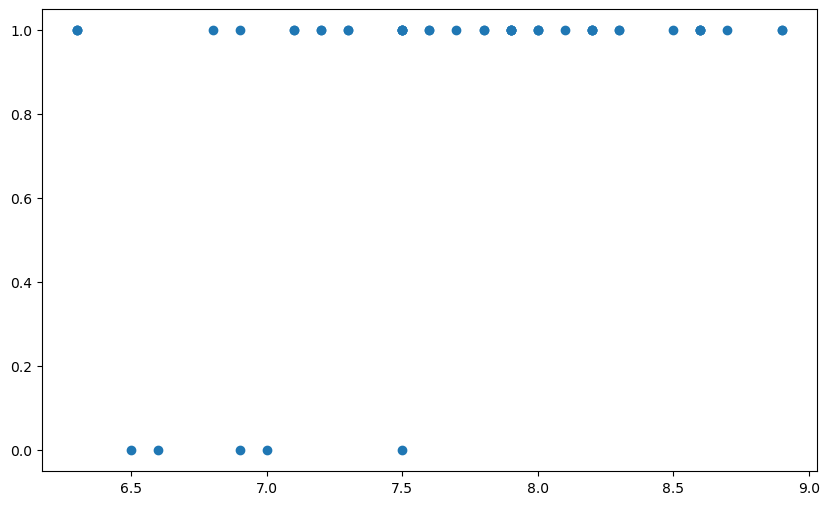

In [451]:
plt.figure(figsize=(10, 6))
plt.scatter(X['avg_rating'], X['fast_charging_available'], label='Data Points', alpha=1)

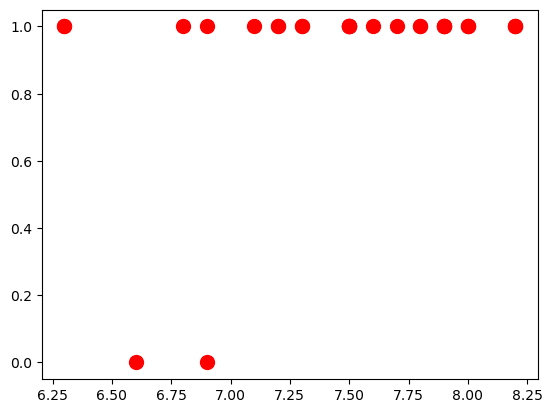

In [452]:
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],color='r', s=100, label='Support Vectors')

C:\Users\Nikos\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


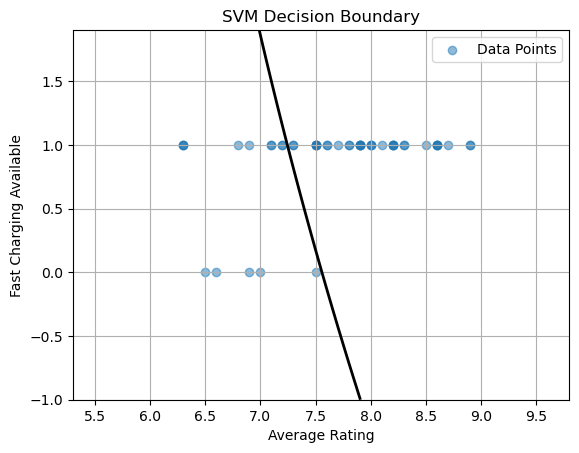

In [454]:
import numpy as np
xlim = [X['avg_rating'].min() - 1, X['avg_rating'].max() + 1]
ylim = [X['fast_charging_available'].min() - 1, X['fast_charging_available'].max() + 1]
h = 0.1  
xx, yy = np.meshgrid(np.arange(xlim[0], xlim[1], h),
                     np.arange(ylim[0], ylim[1], h))

Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')
plt.scatter(X['avg_rating'], X['fast_charging_available'], label='Data Points', alpha=0.5)
plt.xlabel('Average Rating')
plt.ylabel('Fast Charging Available')
plt.title('SVM Decision Boundary')
plt.legend()
plt.grid()
plt.show()